# Feature importances estimation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
file=pd.read_csv('train2.csv')

In [3]:
#file.head()
import seaborn as sns
import matplotlib.pyplot as plt

## Whole dataset correlation

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-13-9886f975e48c>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('alltempdata.jpg',
<ipython-input-13-9886f975e48c>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('alltempdata.jpg',
<ipython-input-13-9886f975e48c>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "metadata" which is no longer supported as of 3.3 and 

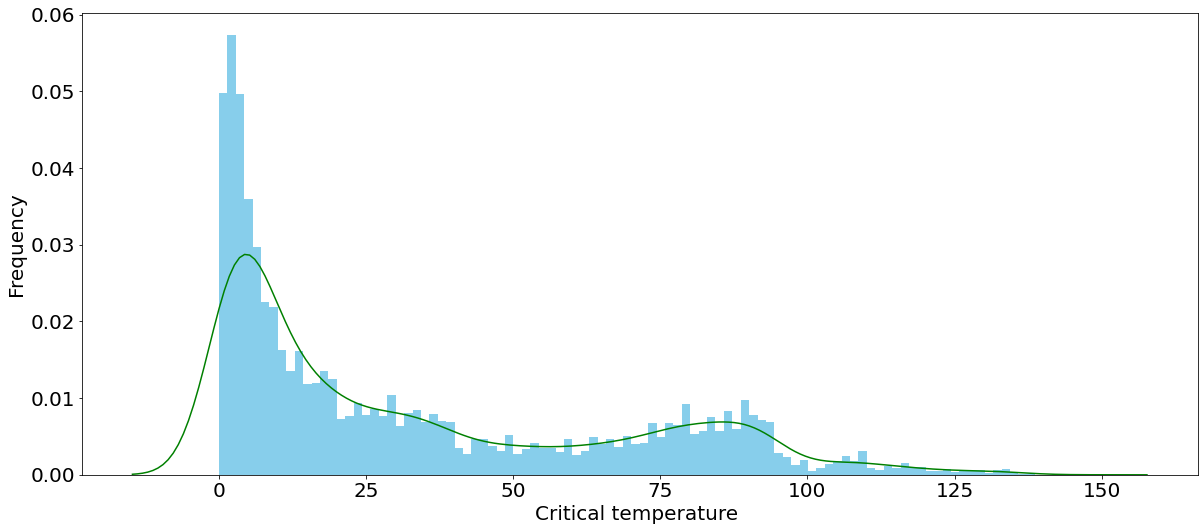

In [13]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(20, 8.5))
ax = sns.distplot(file['critical_temp'],
                  bins=100,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 35,'alpha':1,'color':'skyblue'})
ax.set(xlabel='Critical temperature ', ylabel='Frequency')
#ax.rc('xtick', labelsize=20) 
#ax.rc('ytick', labelsize=20)
plt.savefig('alltempdata.jpg', 
                          dpi=800,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format="jpg",
                          transparent=False,
                          bbox_inches="tight", 
                          pad_inches=0,
                          frameon=None, 
                          metadata=None)

## Correlation

## Heatmap

In [6]:
file.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


## Heatmap

<ipython-input-89-2170968410ff>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('alltempcorr.jpg',
<ipython-input-89-2170968410ff>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('alltempcorr.jpg',
<ipython-input-89-2170968410ff>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "metadata" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('alltempcorr.jpg',


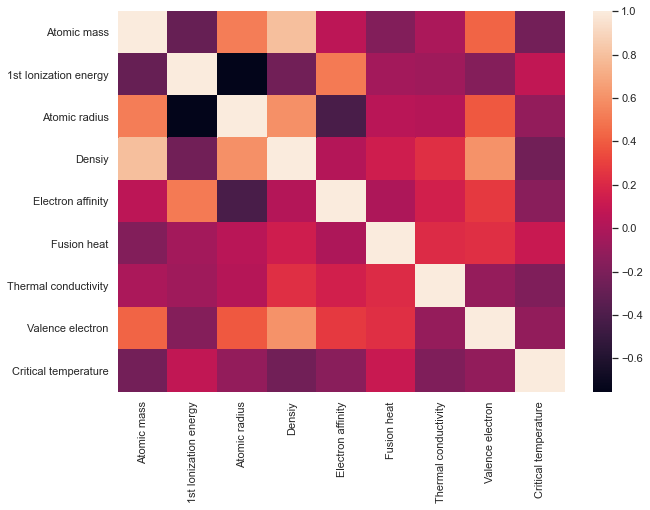

In [89]:
file=pd.read_csv('train2.csv')
file=file[file['critical_temp'] <= 10]

col=file.columns.tolist()
col_list=[]
for i in range(len(col)):
    if col[i][0:8]=='wtd_mean':
        col_list.append(col[i])

col_list.append('critical_temp')
new_file=file[col_list]
new_file=new_file.rename(columns={"wtd_mean_atomic_mass": "Atomic mass", "wtd_mean_First ionization energy": "1st Ionization energy","wtd_mean_atomic_radius":"Atomic radius","wtd_mean_Density":"Densiy","wtd_mean_ElectronAffinity":"Electron affinity","wtd_mean_FusionHeat":"Fusion heat","wtd_mean_ThermalConductivity":"Thermal conductivity","wtd_mean_Valence":"Valence electron","critical_temp":"Critical temperature"})
sns.set(rc={'figure.figsize':(10,7)})
sns.set(font_scale = 1)
figure=sns.heatmap(new_file.corr())
#figure.set_xlabel("Heat map of features")
fig = figure.get_figure()
#fig.savefig("All_temp_correlation.png",orientation="landscape",bbox_inches="tight") 
plt.savefig('alltempcorr.jpg', 
                          dpi=500,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches="tight", 
                          pad_inches=0.1,
                          frameon=None, 
                          metadata=None)

In [53]:
fig = figure.get_figure()
fig.savefig("All_temp_correlation.png",orientation="landscape",bbox_inches="tight") 

### Features rename

In [4]:
mapp={'n':'No. of elements','ThermalConductivity':'Thermal Conductivity','Density':'Density','Valence':'Valence electron','atomicmass':'Atomic mass','ElectronAffinity':'Electron Affinity','atomicradius':'Atomic radius','fie':'1st Ionization Enthalpy','FusionHeat':'Fusion heat'}

## Pareto Chart

<ipython-input-5-183700e6b2d7>:47: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('alltemppareto.jpg',
<ipython-input-5-183700e6b2d7>:47: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('alltemppareto.jpg',
<ipython-input-5-183700e6b2d7>:47: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "metadata" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('alltemppareto.jpg',


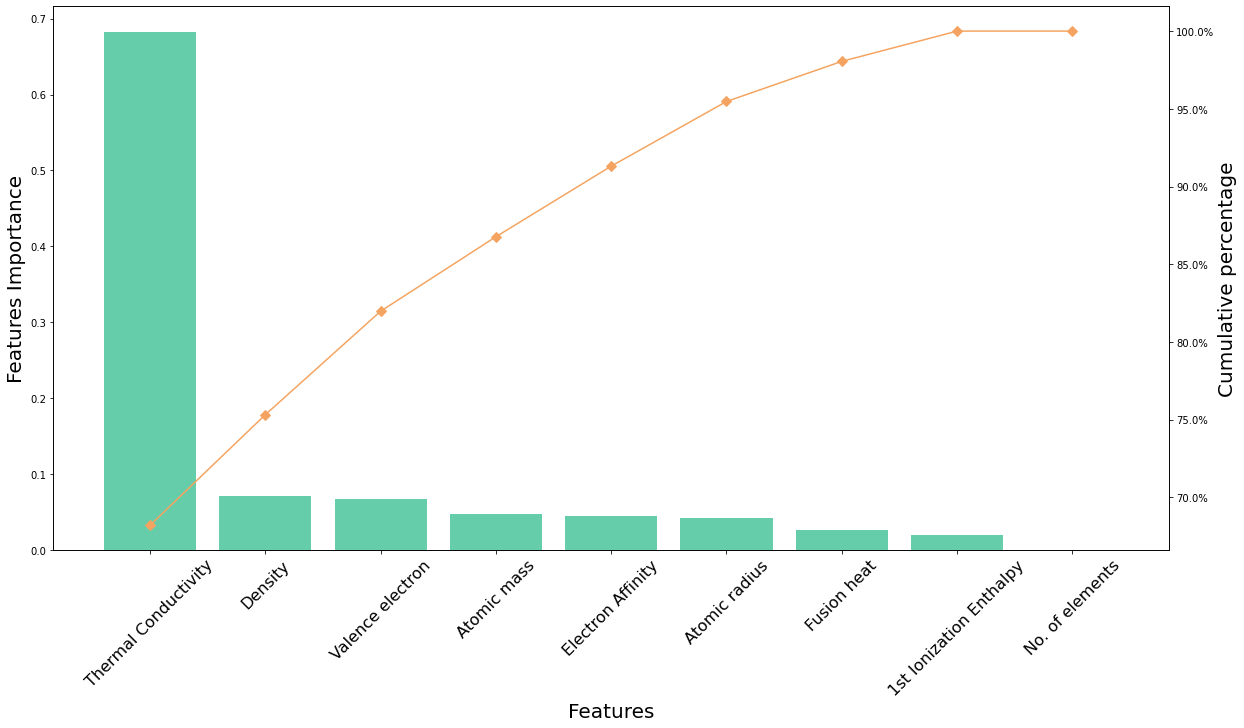

In [5]:
file=pd.read_csv('train3.csv')
y=file['critical_temp']
index_1=file.columns.tolist()[0:-1]
X=file[index_1]

# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
features=pd.DataFrame(data={'Features':index_1,'importance':importance})
#features=features.sort_values(by='importance',ascending=False)


features[['stats','feat']]=features['Features'].str.split("_",expand=True)
features_group=features.groupby('feat')
importance=[]
feat1=[]
uni=features['feat'].unique()
for group in uni:
    df=features_group.get_group(group)
    feat1.append(mapp[group])
    importance.append(df['importance'].sum())
    
features=pd.DataFrame(data={'Features':feat1,'importance':importance})
features=features.sort_values(by='importance',ascending=False)
features["cumpercentage"] = features["importance"].cumsum()/features["importance"].sum()*100

features.to_excel('all_temp_f.xlsx')
fig, ax = plt.subplots(figsize=(20, 10))
#plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=45,size =16)

ax.bar(features['Features'], features["importance"], color="mediumaquamarine")
ax2 = ax.twinx()
ax2.plot(features['Features'], features["cumpercentage"], color="sandybrown", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel('Cumulative percentage',fontsize=20)
ax.set_ylabel('Features Importance',fontsize=20)
ax.set_xlabel('Features',fontsize=20)
#ax2.set_title('Pareto chart',fontsize=20)
ax.tick_params(axis="y", colors="black")
ax2.tick_params(axis="y", colors="black")
plt.savefig('alltemppareto.jpg', 
                          dpi=800,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format="jpg",
                          transparent=False,
                          bbox_inches="tight", 
                          pad_inches=0,
                          frameon=None, 
                          metadata=None)

plt.show()


## Separating Type I and Txype II superconductor

## Type I (0-10K)

In [62]:
typei_temperature=file[file['critical_temp'] <= 10]

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-66-1b2a86f38800>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('typeIdata.jpg',
<ipython-input-66-1b2a86f38800>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('typeIdata.jpg',
<ipython-input-66-1b2a86f38800>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "metadata" which is no longer supported as of 3.3 and will

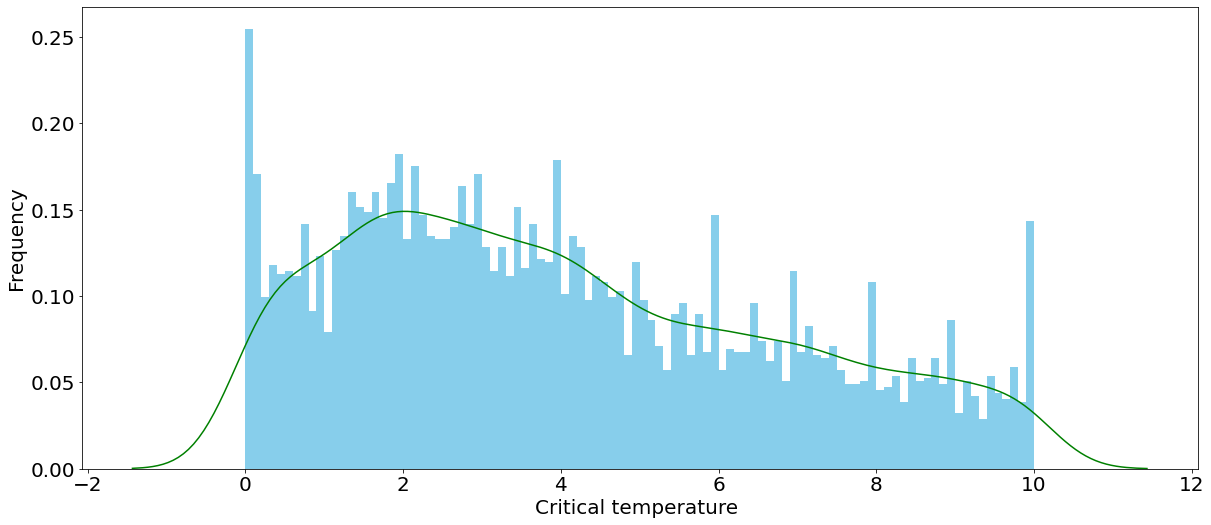

In [66]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(20, 8.5))
ax = sns.distplot(typei_temperature['critical_temp'],
                  bins=100,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 35,'alpha':1,'color':'skyblue'})
ax.set(xlabel='Critical temperature ', ylabel='Frequency')
#ax.rc('xtick', labelsize=20) 
#ax.rc('ytick', labelsize=20)
plt.savefig('typeIdata.jpg', 
                          dpi=800,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format="jpg",
                          transparent=False,
                          bbox_inches="tight", 
                          pad_inches=0,
                          frameon=None, 
                          metadata=None)

<ipython-input-6-daba81bf7c1b>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('typeIcorr.jpg',
<ipython-input-6-daba81bf7c1b>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('typeIcorr.jpg',
<ipython-input-6-daba81bf7c1b>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "metadata" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('typeIcorr.jpg',


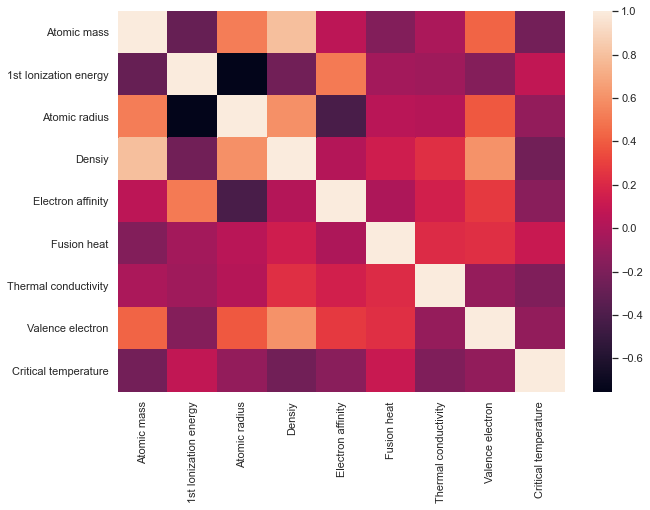

In [6]:
file=pd.read_csv('train2.csv')
typei_temperature=file[file['critical_temp'] <= 10]

col=typei_temperature.columns.tolist()
col_list=[]
for i in range(len(col)):
    if col[i][0:8]=='wtd_mean':
        col_list.append(col[i])

col_list.append('critical_temp')
new_file=typei_temperature[col_list]
new_file=new_file.rename(columns={"wtd_mean_atomic_mass": "Atomic mass", "wtd_mean_First ionization energy": "1st Ionization energy","wtd_mean_atomic_radius":"Atomic radius","wtd_mean_Density":"Densiy","wtd_mean_ElectronAffinity":"Electron affinity","wtd_mean_FusionHeat":"Fusion heat","wtd_mean_ThermalConductivity":"Thermal conductivity","wtd_mean_Valence":"Valence electron","critical_temp":"Critical temperature"})
sns.set(rc={'figure.figsize':(10,7)})
sns.set(font_scale = 1)
figure=sns.heatmap(new_file.corr())
#figure.set_xlabel("Heat map of features")
fig = figure.get_figure()
#fig.savefig("All_temp_correlation.png",orientation="landscape",bbox_inches="tight") 
plt.savefig('typeIcorr.jpg', 
                          dpi=500,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches="tight", 
                          pad_inches=0.1,
                          frameon=None, 
                          metadata=None)

<ipython-input-6-35d3694eeabc>:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('typeIpareto.jpg',
<ipython-input-6-35d3694eeabc>:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('typeIpareto.jpg',
<ipython-input-6-35d3694eeabc>:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "metadata" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('typeIpareto.jpg',


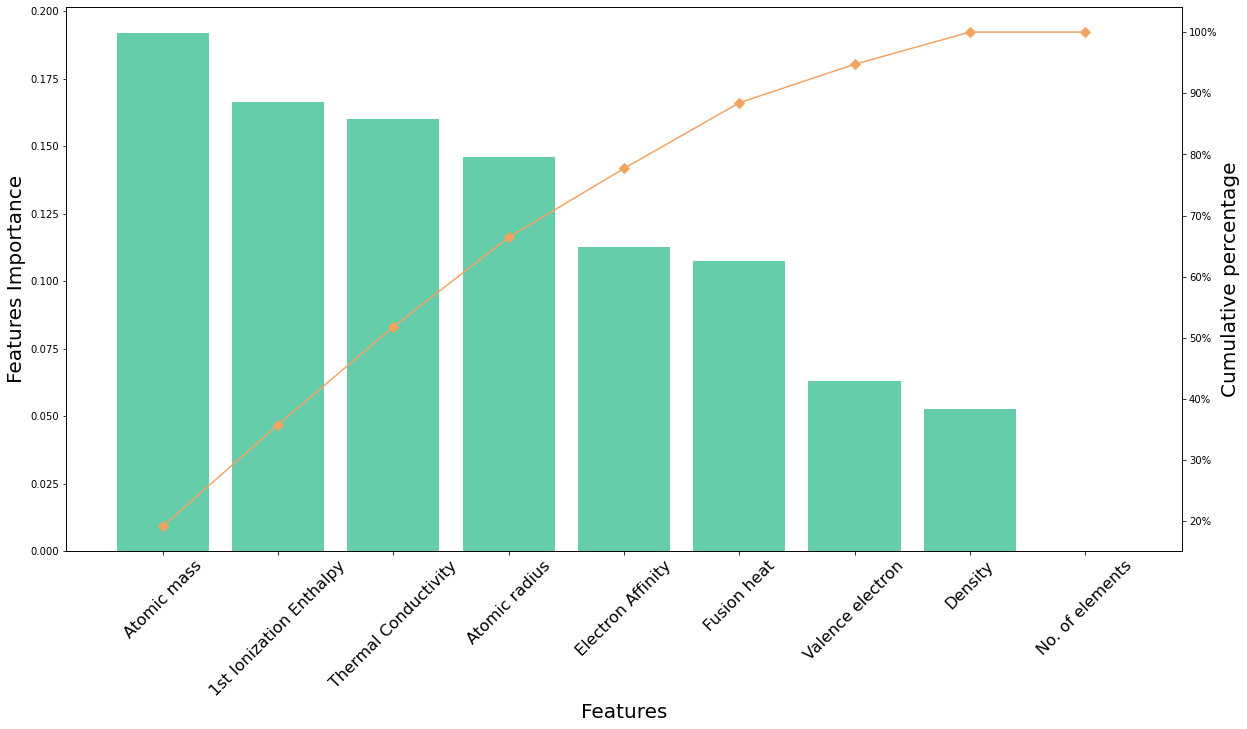

In [6]:
file=pd.read_csv('train3.csv')
typei_temperature=file[file['critical_temp'] <= 10]
y=typei_temperature['critical_temp']
index_1=typei_temperature.columns.tolist()[0:-1]
X=typei_temperature[index_1]

# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
features=pd.DataFrame(data={'Features':index_1,'importance':importance})
#features=features.sort_values(by='importance',ascending=False)


features[['stats','feat']]=features['Features'].str.split("_",expand=True)
features_group=features.groupby('feat')
importance=[]
feat1=[]
uni=features['feat'].unique()
for group in uni:
    df=features_group.get_group(group)
    feat1.append(mapp[group])
    importance.append(df['importance'].sum())
    
features=pd.DataFrame(data={'Features':feat1,'importance':importance})
features=features.sort_values(by='importance',ascending=False)
features["cumpercentage"] = features["importance"].cumsum()/features["importance"].sum()*100
features.to_excel('typei_f.xlsx')


fig, ax = plt.subplots(figsize=(20, 10))
#plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=45,size =16)

ax.bar(features['Features'], features["importance"], color="mediumaquamarine")
ax2 = ax.twinx()
ax2.plot(features['Features'], features["cumpercentage"], color="sandybrown", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel('Cumulative percentage',fontsize=20)
ax.set_ylabel('Features Importance',fontsize=20)
ax.set_xlabel('Features',fontsize=20)
#ax2.set_title('Pareto chart',fontsize=20)
ax.tick_params(axis="y", colors="black")
ax2.tick_params(axis="y", colors="black")
plt.savefig('typeIpareto.jpg', 
                          dpi=800,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format="jpg",
                          transparent=False,
                          bbox_inches="tight", 
                          pad_inches=0,
                          frameon=None, 
                          metadata=None)

plt.show()

## Type II (>10K)

In [35]:
typeii_temperature=file[file['critical_temp'] > 10]

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-65-6221993807ca>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('typeIIdata.jpg',
<ipython-input-65-6221993807ca>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('typeIIdata.jpg',
<ipython-input-65-6221993807ca>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "metadata" which is no longer supported as of 3.3 and wi

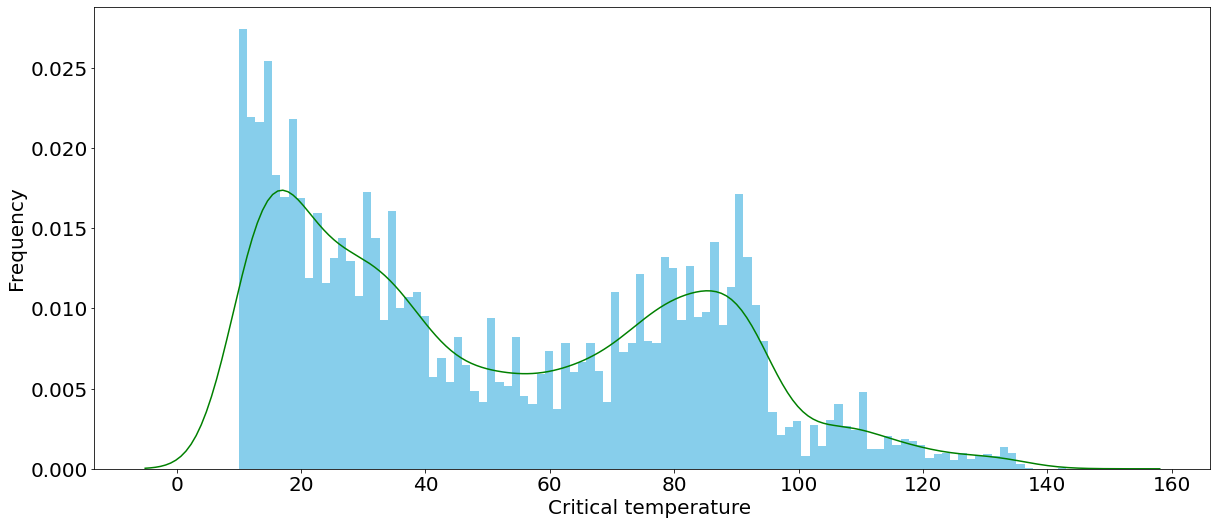

In [65]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(20, 8.5))
ax = sns.distplot(typeii_temperature['critical_temp'],
                  bins=100,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 35,'alpha':1,'color':'skyblue'})
ax.set(xlabel='Critical temperature ', ylabel='Frequency')
#ax.rc('xtick', labelsize=20) 
#ax.rc('ytick', labelsize=20)
plt.savefig('typeIIdata.jpg', 
                          dpi=800,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format="jpg",
                          transparent=False,
                          bbox_inches="tight", 
                          pad_inches=0,
                          frameon=None, 
                          metadata=None)

<ipython-input-7-00e985406c92>:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('typeIIpareto.jpg',
<ipython-input-7-00e985406c92>:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('typeIIpareto.jpg',
<ipython-input-7-00e985406c92>:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "metadata" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('typeIIpareto.jpg',


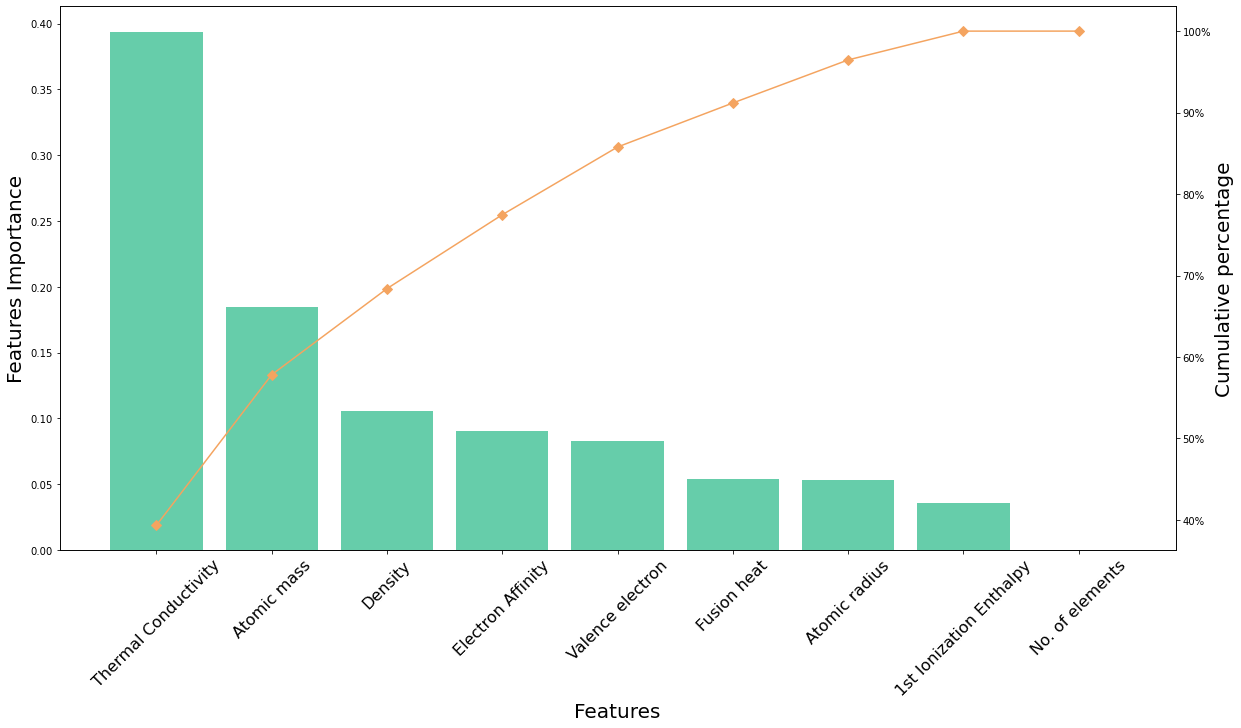

In [7]:
file=pd.read_csv('train3.csv')
typeii_temperature=file[file['critical_temp'] > 10]
y=typeii_temperature['critical_temp']
index_1=typeii_temperature.columns.tolist()[0:-1]
X=typeii_temperature[index_1]

# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
features=pd.DataFrame(data={'Features':index_1,'importance':importance})
#features=features.sort_values(by='importance',ascending=False)


features[['stats','feat']]=features['Features'].str.split("_",expand=True)
features_group=features.groupby('feat')
importance=[]
feat1=[]
uni=features['feat'].unique()
for group in uni:
    df=features_group.get_group(group)
    feat1.append(mapp[group])
    importance.append(df['importance'].sum())
    
features=pd.DataFrame(data={'Features':feat1,'importance':importance})
features=features.sort_values(by='importance',ascending=False)
features["cumpercentage"] = features["importance"].cumsum()/features["importance"].sum()*100
features.to_excel('typeii_f.xlsx')


fig, ax = plt.subplots(figsize=(20, 10))
#plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=45,size =16)

ax.bar(features['Features'], features["importance"], color="mediumaquamarine")
ax2 = ax.twinx()
ax2.plot(features['Features'], features["cumpercentage"], color="sandybrown", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel('Cumulative percentage',fontsize=20)
ax.set_ylabel('Features Importance',fontsize=20)
ax.set_xlabel('Features',fontsize=20)
#ax2.set_title('Pareto chart',fontsize=20)
ax.tick_params(axis="y", colors="black")
ax2.tick_params(axis="y", colors="black")
plt.savefig('typeIIpareto.jpg', 
                          dpi=800,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format="jpg",
                          transparent=False,
                          bbox_inches="tight", 
                          pad_inches=0,
                          frameon=None, 
                          metadata=None)

plt.show()

<ipython-input-10-9bd06b0298b7>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('typeIIcorr.jpg',
<ipython-input-10-9bd06b0298b7>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('typeIIcorr.jpg',
<ipython-input-10-9bd06b0298b7>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "metadata" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('typeIIcorr.jpg',


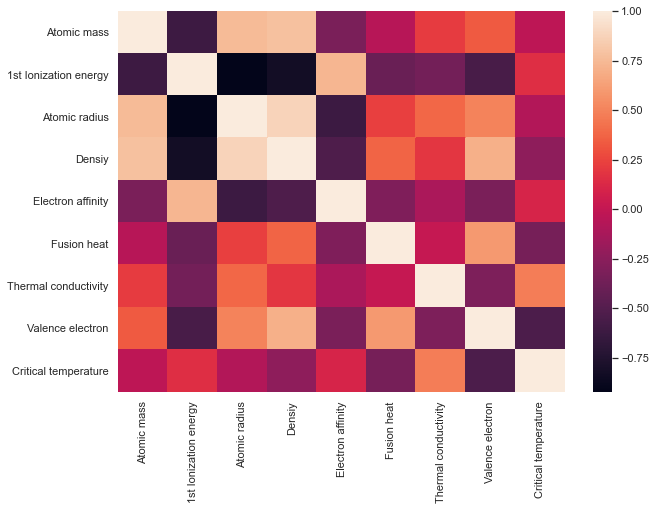

In [10]:
file=pd.read_csv('train2.csv')
typeii_temperature=file[file['critical_temp'] > 10]

col=typeii_temperature.columns.tolist()
col_list=[]
for i in range(len(col)):
    if col[i][0:8]=='wtd_mean':
        col_list.append(col[i])

col_list.append('critical_temp')
new_file=typeii_temperature[col_list]
new_file=new_file.rename(columns={"wtd_mean_atomic_mass": "Atomic mass", "wtd_mean_First ionization energy": "1st Ionization energy","wtd_mean_atomic_radius":"Atomic radius","wtd_mean_Density":"Densiy","wtd_mean_ElectronAffinity":"Electron affinity","wtd_mean_FusionHeat":"Fusion heat","wtd_mean_ThermalConductivity":"Thermal conductivity","wtd_mean_Valence":"Valence electron","critical_temp":"Critical temperature"})
sns.set(rc={'figure.figsize':(10,7)})
sns.set(font_scale = 1)
figure=sns.heatmap(new_file.corr())
#figure.set_xlabel("Heat map of features")
fig = figure.get_figure()
#fig.savefig("All_temp_correlation.png",orientation="landscape",bbox_inches="tight") 
plt.savefig('typeIIcorr.jpg', 
                          dpi=500,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches="tight", 
                          pad_inches=0.1,
                          frameon=None, 
                          metadata=None)

## Separating high temperature and low temperature superconductor

## High temperature

Temperature above 77K is considered high temperature superconductor

 Source: Timmer, John (May 2011). "25 years on, the search for higher-temp superconductors continues". Ars Technica. Archived from the original on 4 March 2012. Retrieved 2 March 2012.

Separating temperature = 77K

In [67]:
separating_temp= 77

In [69]:
high_temperature=file[file['critical_temp'] >= separating_temp]

Above picture shows variations of critical temperature for low temperature super conductor

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-70-cde4632e6d17>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('hightempdata.jpg',
<ipython-input-70-cde4632e6d17>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('hightempdata.jpg',
<ipython-input-70-cde4632e6d17>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "metadata" which is no longer supported as of 3.3 an

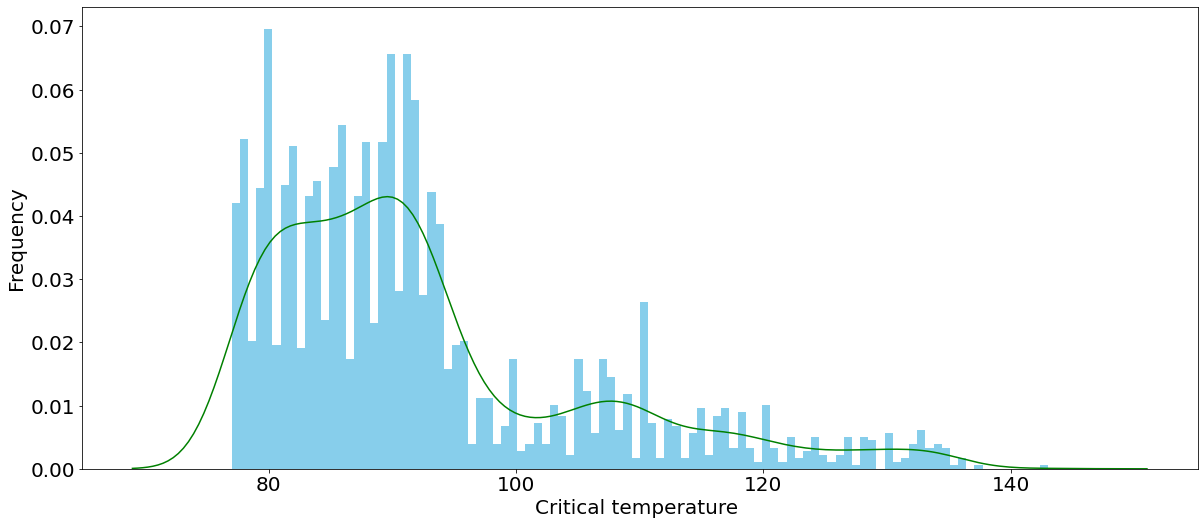

In [70]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(20, 8.5))
ax = sns.distplot(high_temperature['critical_temp'],
                  bins=100,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 35,'alpha':1,'color':'skyblue'})
ax.set(xlabel='Critical temperature ', ylabel='Frequency')
#ax.rc('xtick', labelsize=20) 
#ax.rc('ytick', labelsize=20)
plt.savefig('hightempdata.jpg', 
                          dpi=800,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format="jpg",
                          transparent=False,
                          bbox_inches="tight", 
                          pad_inches=0,
                          frameon=None, 
                          metadata=None)

## Correlation

<ipython-input-8-8d751093a449>:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('hightemppareto.jpg',
<ipython-input-8-8d751093a449>:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('hightemppareto.jpg',
<ipython-input-8-8d751093a449>:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "metadata" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('hightemppareto.jpg',


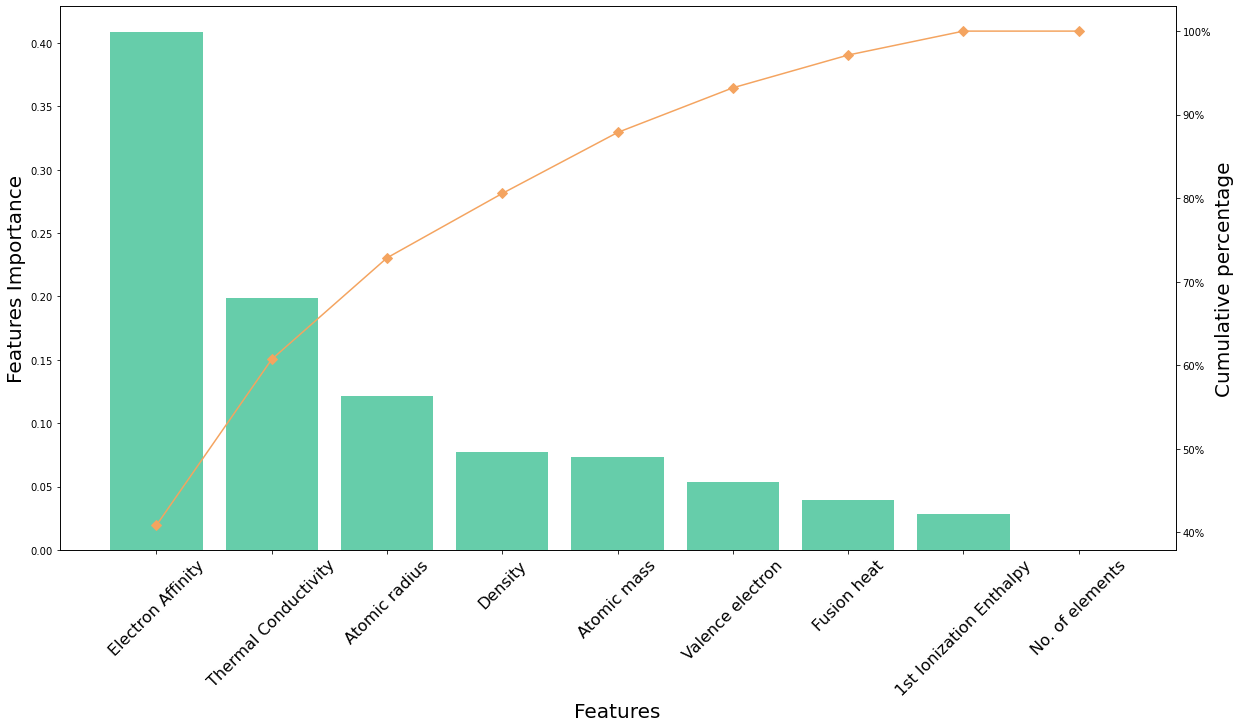

In [8]:
file=pd.read_csv('train3.csv')
high_temperature=file[file['critical_temp'] > 77]
y=high_temperature['critical_temp']
index_1=high_temperature.columns.tolist()[0:-1]
X=high_temperature[index_1]

# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
features=pd.DataFrame(data={'Features':index_1,'importance':importance})
#features=features.sort_values(by='importance',ascending=False)


features[['stats','feat']]=features['Features'].str.split("_",expand=True)
features_group=features.groupby('feat')
importance=[]
feat1=[]
uni=features['feat'].unique()
for group in uni:
    df=features_group.get_group(group)
    feat1.append(mapp[group])
    importance.append(df['importance'].sum())
    
features=pd.DataFrame(data={'Features':feat1,'importance':importance})
features=features.sort_values(by='importance',ascending=False)
features["cumpercentage"] = features["importance"].cumsum()/features["importance"].sum()*100
features.to_excel('hts_f.xlsx')


fig, ax = plt.subplots(figsize=(20, 10))
#plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=45,size =16)

ax.bar(features['Features'], features["importance"], color="mediumaquamarine")
ax2 = ax.twinx()
ax2.plot(features['Features'], features["cumpercentage"], color="sandybrown", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel('Cumulative percentage',fontsize=20)
ax.set_ylabel('Features Importance',fontsize=20)
ax.set_xlabel('Features',fontsize=20)
#ax2.set_title('Pareto chart',fontsize=20)
ax.tick_params(axis="y", colors="black")
ax2.tick_params(axis="y", colors="black")
plt.savefig('hightemppareto.jpg', 
                          dpi=800,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format="jpg",
                          transparent=False,
                          bbox_inches="tight", 
                          pad_inches=0,
                          frameon=None, 
                          metadata=None)

plt.show()

<ipython-input-90-6db5818b752f>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('hightempcorr.jpg',
<ipython-input-90-6db5818b752f>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('hightempcorr.jpg',
<ipython-input-90-6db5818b752f>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "metadata" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('hightempcorr.jpg',


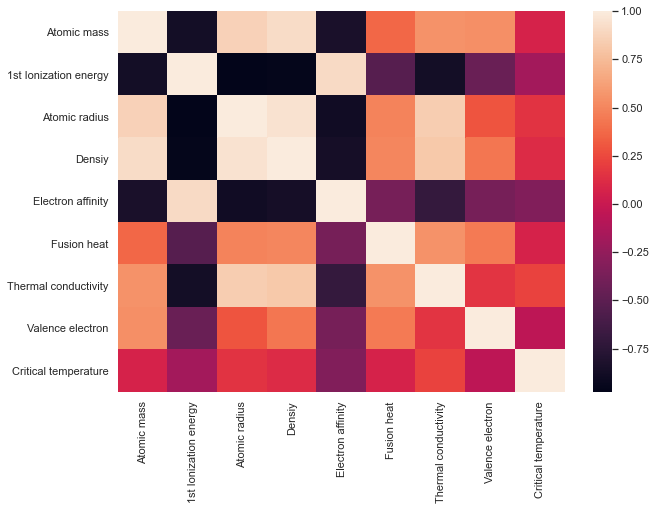

In [90]:
file=pd.read_csv('train2.csv')
high_temperature=file[file['critical_temp'] > 77]

col=high_temperature.columns.tolist()
col_list=[]
for i in range(len(col)):
    if col[i][0:8]=='wtd_mean':
        col_list.append(col[i])

col_list.append('critical_temp')
new_file=high_temperature[col_list]
new_file=new_file.rename(columns={"wtd_mean_atomic_mass": "Atomic mass", "wtd_mean_First ionization energy": "1st Ionization energy","wtd_mean_atomic_radius":"Atomic radius","wtd_mean_Density":"Densiy","wtd_mean_ElectronAffinity":"Electron affinity","wtd_mean_FusionHeat":"Fusion heat","wtd_mean_ThermalConductivity":"Thermal conductivity","wtd_mean_Valence":"Valence electron","critical_temp":"Critical temperature"})
sns.set(rc={'figure.figsize':(10,7)})
sns.set(font_scale = 1)
figure=sns.heatmap(new_file.corr())
#figure.set_xlabel("Heat map of features")
fig = figure.get_figure()
#fig.savefig("All_temp_correlation.png",orientation="landscape",bbox_inches="tight") 
plt.savefig('hightempcorr.jpg', 
                          dpi=500,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches="tight", 
                          pad_inches=0.1,
                          frameon=None, 
                          metadata=None)

## Low temperature

In [71]:
low_temperature=file[file['critical_temp'] < separating_temp]

C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-73-10563012f4ae>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('lowtempdata.jpg',
<ipython-input-73-10563012f4ae>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('lowtempdata.jpg',
<ipython-input-73-10563012f4ae>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "metadata" which is no longer supported as of 3.3 and 

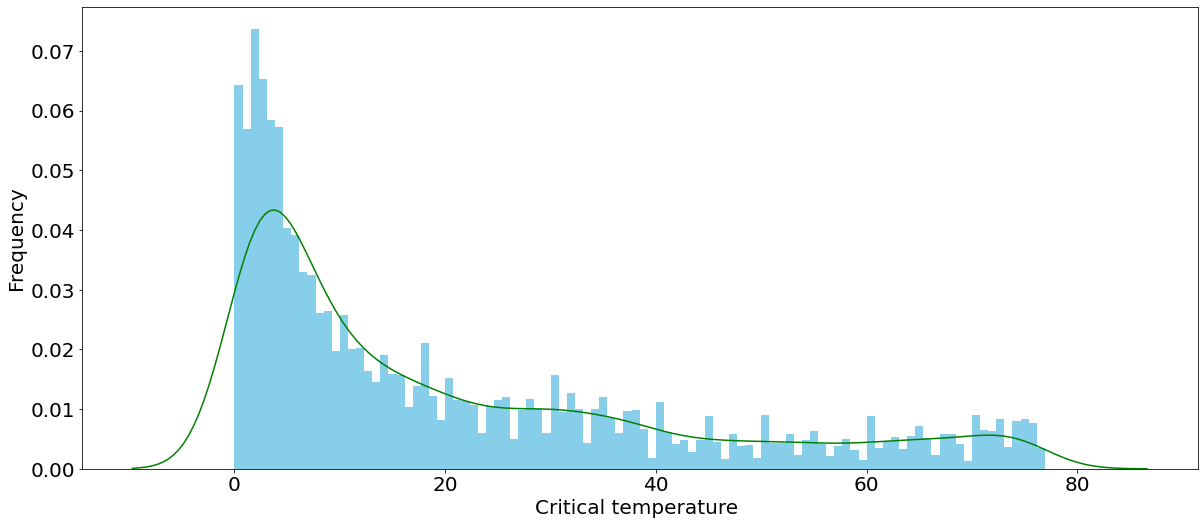

In [73]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(20, 8.5))
ax = sns.distplot(low_temperature['critical_temp'],
                  bins=100,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 35,'alpha':1,'color':'skyblue'})
ax.set(xlabel='Critical temperature ', ylabel='Frequency')
#ax.rc('xtick', labelsize=20) 
#ax.rc('ytick', labelsize=20)
plt.savefig('lowtempdata.jpg', 
                          dpi=800,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format="jpg",
                          transparent=False,
                          bbox_inches="tight", 
                          pad_inches=0,
                          frameon=None, 
                          metadata=None)

<ipython-input-9-c6ae021cc2c6>:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('lowtemppareto.jpg',
<ipython-input-9-c6ae021cc2c6>:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('lowtemppareto.jpg',
<ipython-input-9-c6ae021cc2c6>:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "metadata" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('lowtemppareto.jpg',


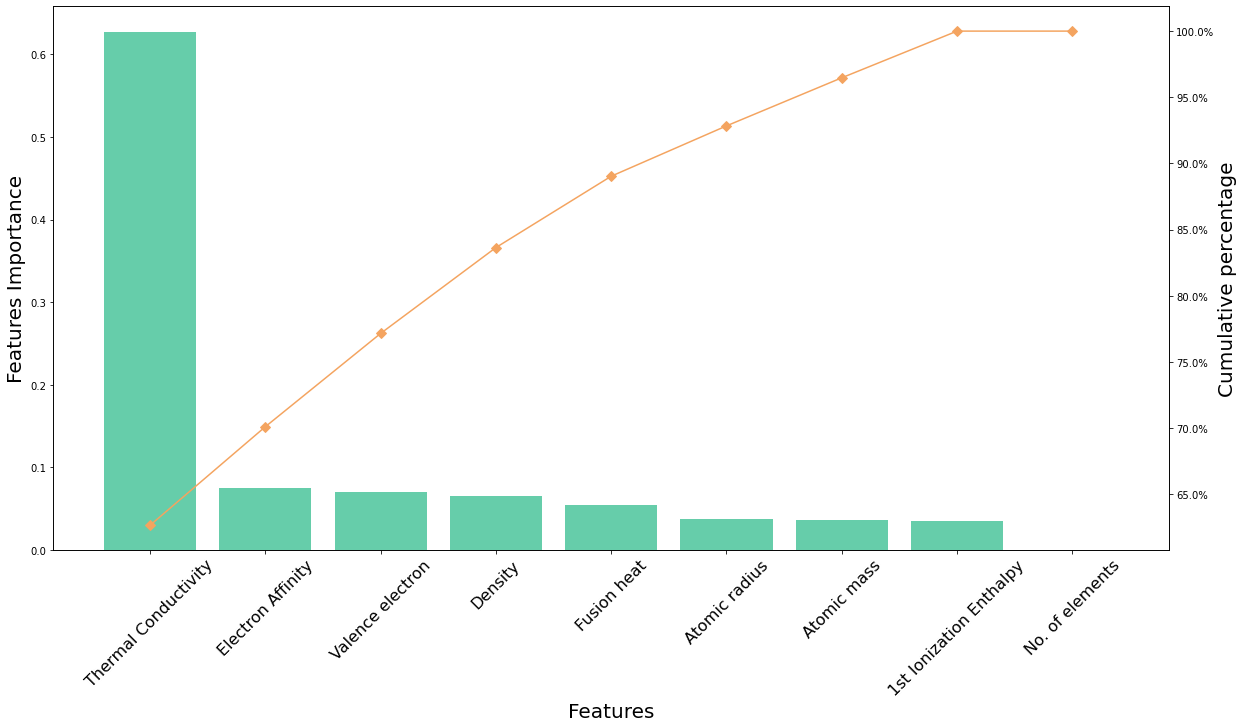

In [9]:
file=pd.read_csv('train3.csv')
low_temperature=file[file['critical_temp'] < 77]
y=low_temperature['critical_temp']
index_1=low_temperature.columns.tolist()[0:-1]
X=low_temperature[index_1]

# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
features=pd.DataFrame(data={'Features':index_1,'importance':importance})
#features=features.sort_values(by='importance',ascending=False)


features[['stats','feat']]=features['Features'].str.split("_",expand=True)
features_group=features.groupby('feat')
importance=[]
feat1=[]
uni=features['feat'].unique()
for group in uni:
    df=features_group.get_group(group)
    feat1.append(mapp[group])
    importance.append(df['importance'].sum())
    
features=pd.DataFrame(data={'Features':feat1,'importance':importance})
features=features.sort_values(by='importance',ascending=False)
features["cumpercentage"] = features["importance"].cumsum()/features["importance"].sum()*100

features.to_excel('lts_f.xlsx')

fig, ax = plt.subplots(figsize=(20, 10))
#plt.rcParams.update({'font.size': 20})
plt.xticks(rotation=45,size =16)

ax.bar(features['Features'], features["importance"], color="mediumaquamarine")
ax2 = ax.twinx()
ax2.plot(features['Features'], features["cumpercentage"], color="sandybrown", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel('Cumulative percentage',fontsize=20)
ax.set_ylabel('Features Importance',fontsize=20)
ax.set_xlabel('Features',fontsize=20)
#ax2.set_title('Pareto chart',fontsize=20)
ax.tick_params(axis="y", colors="black")
ax2.tick_params(axis="y", colors="black")
plt.savefig('lowtemppareto.jpg', 
                          dpi=800,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format="jpg",
                          transparent=False,
                          bbox_inches="tight", 
                          pad_inches=0,
                          frameon=None, 
                          metadata=None)

plt.show()

<ipython-input-85-d6012079146a>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('lowtempcorr.jpg',
<ipython-input-85-d6012079146a>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('lowtempcorr.jpg',
<ipython-input-85-d6012079146a>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "metadata" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('lowtempcorr.jpg',


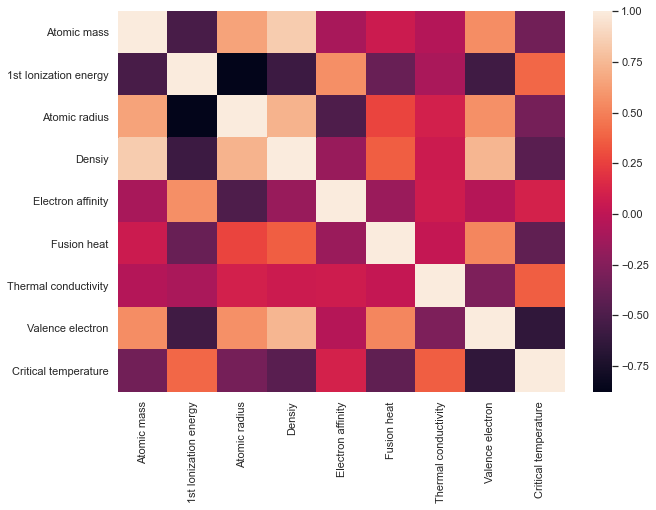

In [85]:
file=pd.read_csv('train2.csv')
low_temperature=file[file['critical_temp'] > 77]

col=low_temperature.columns.tolist()
col_list=[]
for i in range(len(col)):
    if col[i][0:8]=='wtd_mean':
        col_list.append(col[i])

col_list.append('critical_temp')
new_file=file[col_list]
new_file=new_file.rename(columns={"wtd_mean_atomic_mass": "Atomic mass", "wtd_mean_First ionization energy": "1st Ionization energy","wtd_mean_atomic_radius":"Atomic radius","wtd_mean_Density":"Densiy","wtd_mean_ElectronAffinity":"Electron affinity","wtd_mean_FusionHeat":"Fusion heat","wtd_mean_ThermalConductivity":"Thermal conductivity","wtd_mean_Valence":"Valence electron","critical_temp":"Critical temperature"})
sns.set(rc={'figure.figsize':(10,7)})
sns.set(font_scale = 1)
figure=sns.heatmap(new_file.corr())
#figure.set_xlabel("Heat map of features")
fig = figure.get_figure()
#fig.savefig("All_temp_correlation.png",orientation="landscape",bbox_inches="tight") 
plt.savefig('lowtempcorr.jpg', 
                          dpi=500,
                          facecolor='w',
                          edgecolor='w',
                          orientation='portrait',
                          papertype=None, 
                          format=None,
                          transparent=False,
                          bbox_inches="tight", 
                          pad_inches=0.1,
                          frameon=None, 
                          metadata=None)